In [225]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import colors


In [233]:
column_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv("breast-cancer-data.data",sep=',')
df.columns = column_names
df =df.drop(['ID'],axis=1)
df.head()
X = df.drop('Diagnosis',axis=1).copy()
y = df['Diagnosis'].copy()
y = y.apply(lambda x: 1 if x == 'M' else 0)


In [234]:
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [235]:
from sklearn.linear_model import LinearRegression, LogisticRegression

#my classifier
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled,y_train)
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled,y_train)

LinearRegression()

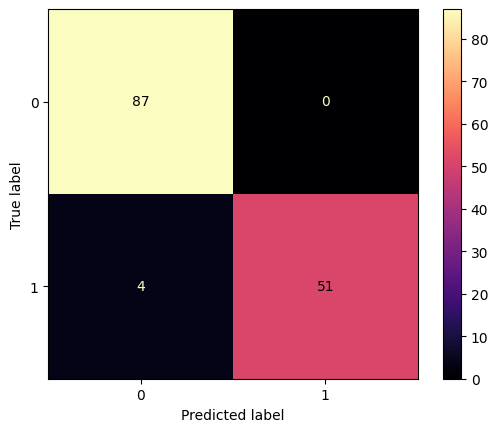

R2 score: 0.8813
RMSD: 0.1678


In [237]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,root_mean_squared_error
def plot_confusion_mat(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    cm = confusion_matrix(y_test1, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='magma')
    plt.savefig("images/cf.png")
    plt.show()

def print_metrics(x_test1,y_test1):
    pred = logistic_reg.predict(x_test1)

    root_mean_squared_error_score = root_mean_squared_error(y_test1, pred)
    r2 = r2_score(y_test1,pred)

    print(f'R2 score: {r2:.4f}')
    print(f'RMSD: {root_mean_squared_error_score:.4f}')

plot_confusion_mat(logistic_reg,X_test_scaled,y_test)
print_metrics(X_test_scaled,y_test)

In [238]:
clf_linear = LinearRegression()
clf_linear.fit(X_train_scaled,y_train)
logistic_predictions = logistic_reg.predict(X_test_scaled)
linear_reg_predictions = linear_reg.predict(X_test_scaled)
analysed_data = pd.DataFrame({
    'Linear-reg': linear_reg_predictions,
    'Logistic-reg': logistic_predictions,
    'Real-values': y_test,
})
analysed_data.head(100)

,Linear-reg,Logistic-reg,Real-values
218,1.018858,1,1
79,0.159695,0,0
104,0.797392,1,1
208,0.280245,0,0
543,0.006753,0,0
...,...,...,...
77,1.023222,1,1
411,-0.349595,0,0
181,0.729518,1,1
238,1.256750,1,1


In [240]:
from scipy.stats import norm

coefficients = logistic_reg.coef_.copy()
std_errors = np.sqrt(np.diag(np.linalg.inv(np.dot(X.T, X))))

# Calculate z-values
z_values = coefficients / std_errors

# Calculate p-values
p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
isGood = np.where(p_values[0] > .05,'false','true')
features = X.columns
coef_and_p_values = pd.DataFrame({
    "features":features,
    "Coefficients":coefficients[0],
    "p-values":p_values[0],
    "is_good":isGood
})
coef_and_p_values.sort_values("p-values")

,features,Coefficients,p-values,is_good
23,area3,0.899207,0.000000e+00,true
1,texture1,0.396365,0.000000e+00,true
3,area1,0.654526,0.000000e+00,true
21,texture3,1.471670,0.000000e+00,true
13,area2,0.865462,0.000000e+00,true
22,perimeter3,0.774206,0.000000e+00,true
2,perimeter1,0.648642,1.703111e-09,true
20,radius3,0.957833,9.198411e-05,true
12,perimeter2,0.651140,1.800102e-04,true
11,texture2,-0.276063,7.693189e-02,false


In [241]:
coefficients[:,np.where(isGood=='false')] =0
print(coefficients)
#clf.coef_ = coefficients

[[0.         0.39636473 0.64864243 0.65452613 0.         0.
  0.         0.         0.         0.         0.         0.
  0.65113996 0.86546157 0.         0.         0.         0.
  0.         0.         0.95783255 1.47167014 0.77420631 0.89920667
  0.         0.         0.         0.         0.         0.        ]]


In [258]:
selected_dataset = X['area3'].copy()
standardized_data = (selected_dataset - np.mean(selected_dataset)) / np.std(selected_dataset, ddof=0)
selected_X_train,_,y_train,_ = train_test_split(standardized_data,y,random_state=42)

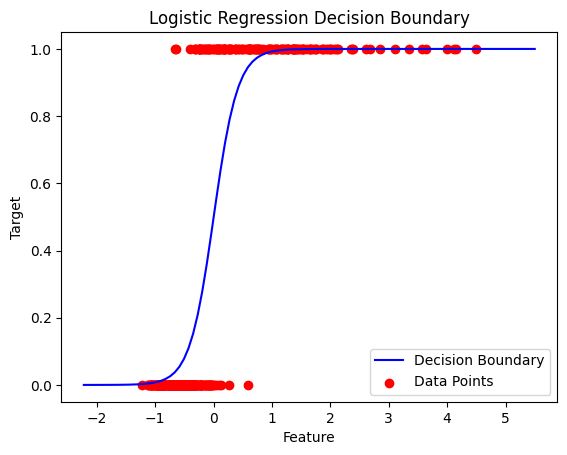

In [259]:
logistic_reg.fit(selected_X_train.values.reshape(-1, 1), y_train)

x_min = selected_X_train.min() - 1
x_max = selected_X_train.max() + 1
x_values = np.linspace(x_min, x_max, 100)

# Calculate corresponding y values using logistic regression model
y_values = logistic_reg.predict_proba(x_values.reshape(-1, 1))[:, 1]  # Probability of class 1

# Plot the decision boundary line
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

# Scatter plot of data points
plt.scatter(selected_X_train, y_train, color='red', label='Data Points')

# Add legend and labels
plt.legend()
plt.title('Logistic Regression Decision Boundary in train data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Logistic Regression Decision Boundary')
plt.savefig('./images/Logistic Regression Decision Boundary.png')
plt.show()

In [260]:
selected_dataset = pd.concat((X['area3'],X['texture1']),axis=1)
selected_dataset = scaler.fit_transform(selected_dataset)
selected_X_train,selected_X_test,y_train,y_test = train_test_split(selected_dataset,y,random_state=42)

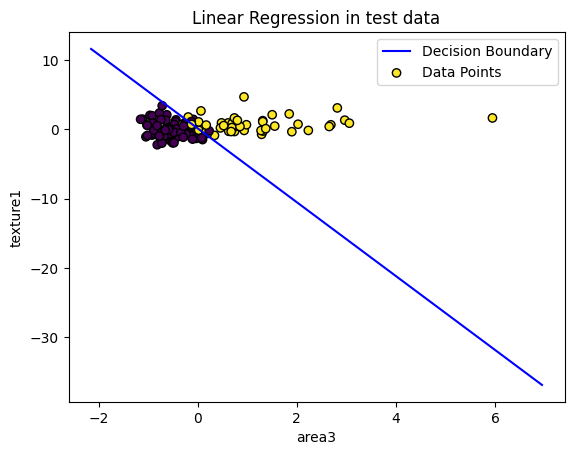

In [261]:
import numpy as np
import matplotlib.pyplot as plt

logistic_reg.fit(selected_X_train, y_train)

# Define range of values for decision boundary line
x_min = selected_X_test[:, 0].min() - 1
x_max = selected_X_test[:, 0].max() + 1
x_values = np.linspace(x_min, x_max, 100)

# Calculate corresponding y values using logistic regression model
y_values = (-logistic_reg.intercept_ - logistic_reg.coef_[0][0] * x_values) / logistic_reg.coef_[0][1]

# Plot the decision boundary line
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

# Scatter plot of data points
plt.scatter(selected_X_test[:, 0], selected_X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', label='Data Points')

# Add legend and labels
plt.legend()
plt.title("Linear Regression in test data")
plt.xlabel('area3')
plt.ylabel('texture1')
plt.savefig('./images/Linear Regression in test data.png')
plt.show()